# Mean Study Distance with PICO Labels Results

Just display the results of the experiments.

In [1]:
df = pd.read_csv('results.csv').dropna()

df

,drug,in_score,model,nb_in,nb_out,out_score,out_set
1,ACEInhibitors,0.681106,pop,168,2,0.110405,outcome
3,ACEInhibitors,0.840536,outcome,168,2,0.300462,outcome
4,ADHD,1.538803,pop,83,4,0.051380,pop
5,ADHD,1.538803,pop,83,21,0.312888,outcome
6,ADHD,0.867198,outcome,83,4,0.042325,pop
7,ADHD,0.867198,outcome,83,21,0.276505,outcome
12,AtypicalAntipsychotics,0.483542,pop,333,94,0.088162,pop
13,AtypicalAntipsychotics,0.483542,pop,333,120,0.088982,outcome
14,AtypicalAntipsychotics,0.702440,outcome,333,94,0.104451,pop
15,AtypicalAntipsychotics,0.702440,outcome,333,120,0.118239,outcome


Studies included in the same review should have higher similarity amongst each other than between studies excluded explicitly due to a PICO element. They do across the board!

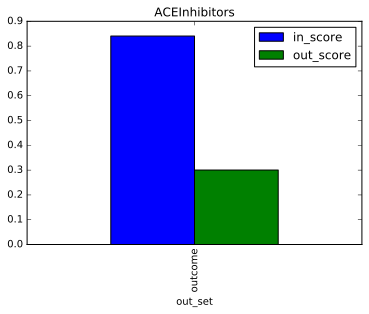

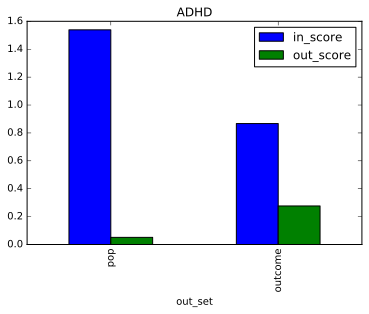

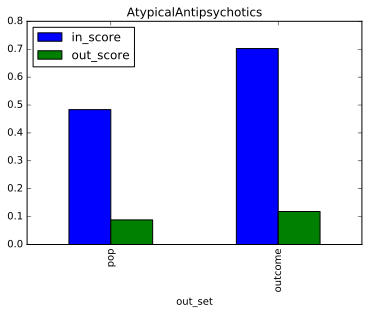

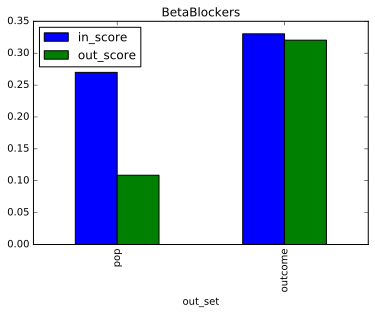

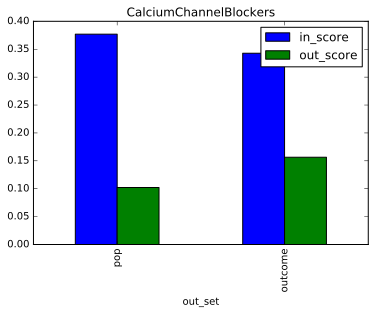

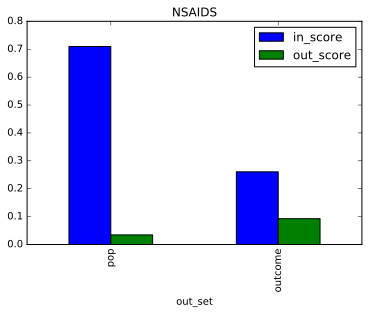

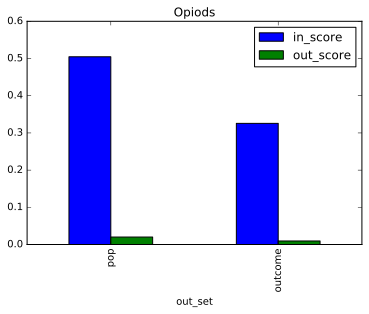

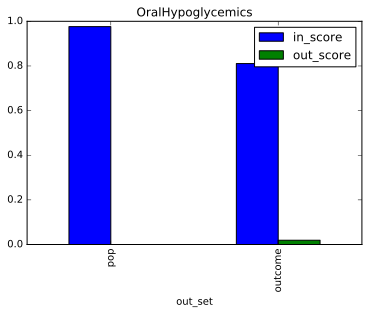

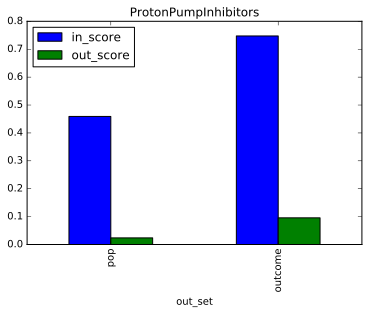

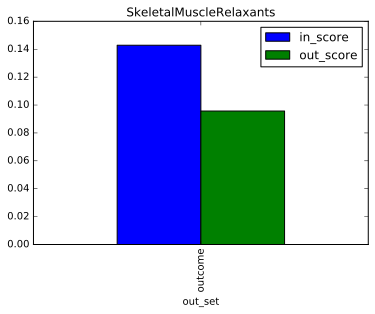

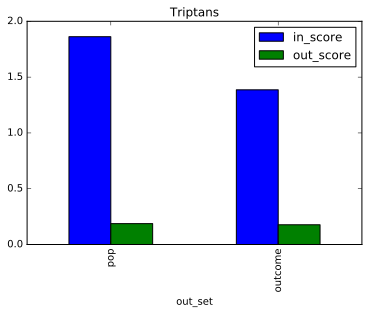

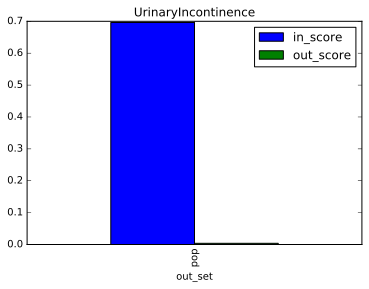

In [2]:
for name, group in df.groupby('drug'):
    axes = group[group.model == group.out_set].set_index('out_set')[['in_score', 'out_score']].plot(kind='bar', title=name)

For a drug review, intuitively an aspects's mean similarity to explicitly excluded summaries for that aspect should be lower than the mean similarity to studies excluded because of another aspect.

Concretely, population vectors for studies in the ADHD review should be very far away from population vectors for studies which were explicitly excluded due to population than studies that were excluded due to outcome (because some studies excluded due to outcome may have overlapping same populations).

The results do not currently back this up. There may be reasons for this and upon second thought, it's not obvious that this property should even hold (e.g. due to normalization issues).

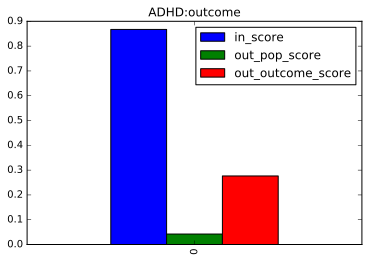

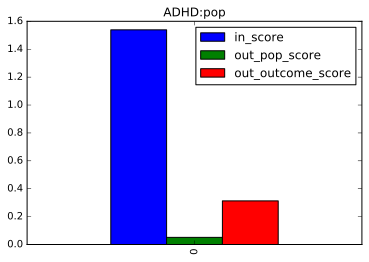

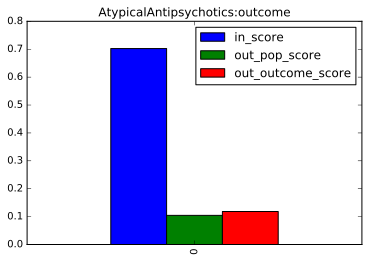

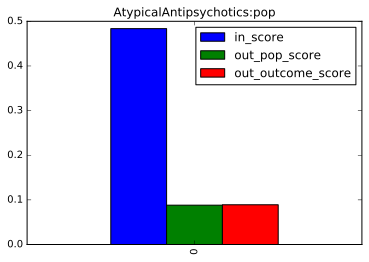

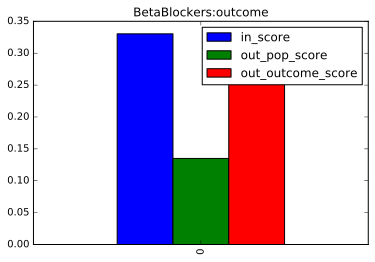

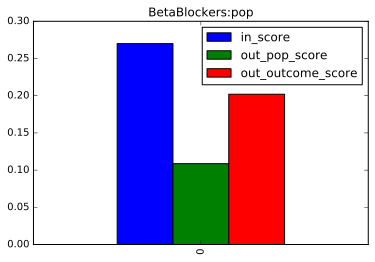

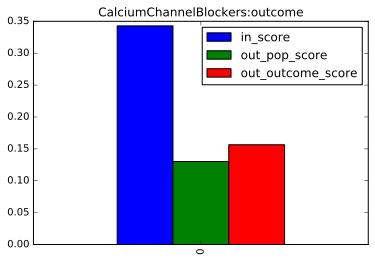

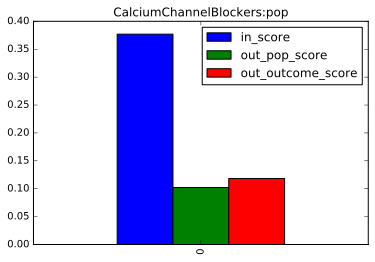

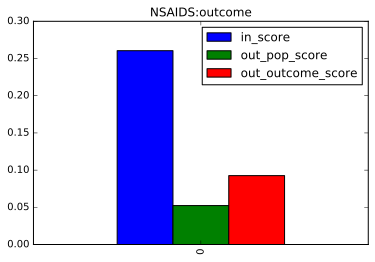

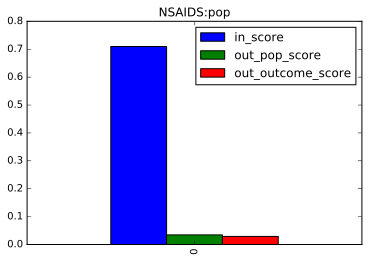

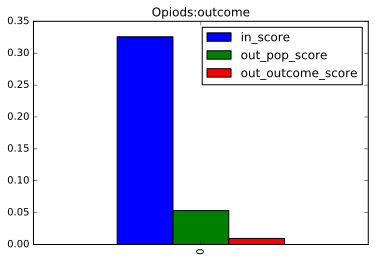

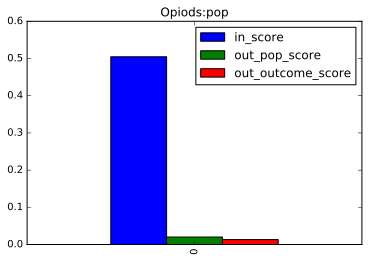

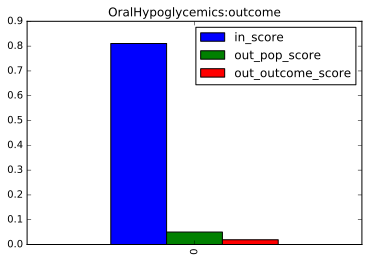

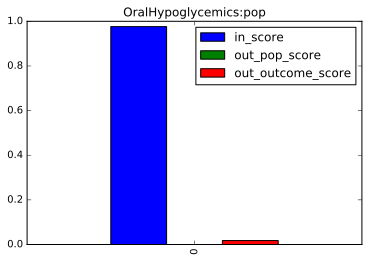

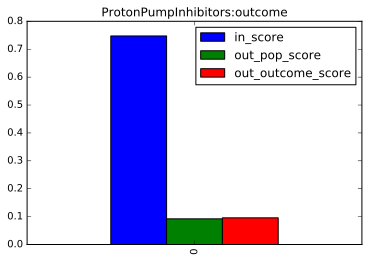

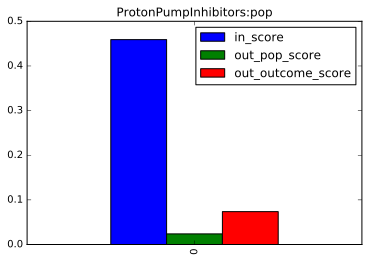

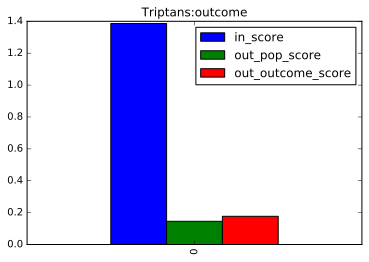

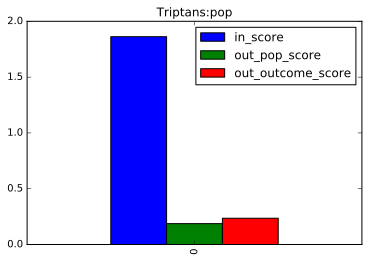

In [16]:
for drug, g1 in df.groupby('drug'):
    for model, g2 in g1.groupby('model'):
        if len(g2) == 1:
            continue # can't compare changes because there's an exclusion set of only one type
            
        df1 = g2.groupby('out_set').get_group('pop').reset_index(drop=True)
        df2 = g2.groupby('out_set').get_group('outcome').reset_index(drop=True)
        
        title = '{}:{}'.format(drug, model)
        joined = df1.join(df2, lsuffix='_l', rsuffix='_r')[['in_score_l', 'out_score_l', 'out_score_r']]
        joined.columns = ['in_score', 'out_pop_score', 'out_outcome_score']
        
        joined.plot(kind='bar', title=title)